In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [53]:
data=pd.read_csv("crime_data.csv")

In [54]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [55]:
data.rename(columns={'Unnamed: 0':'State'}, inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [57]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [58]:
data.duplicated().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x7f56b0c82050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f56b0c82590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f56b0c81db0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f56b0c82ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f56b0c82d70>],
 'means': []}

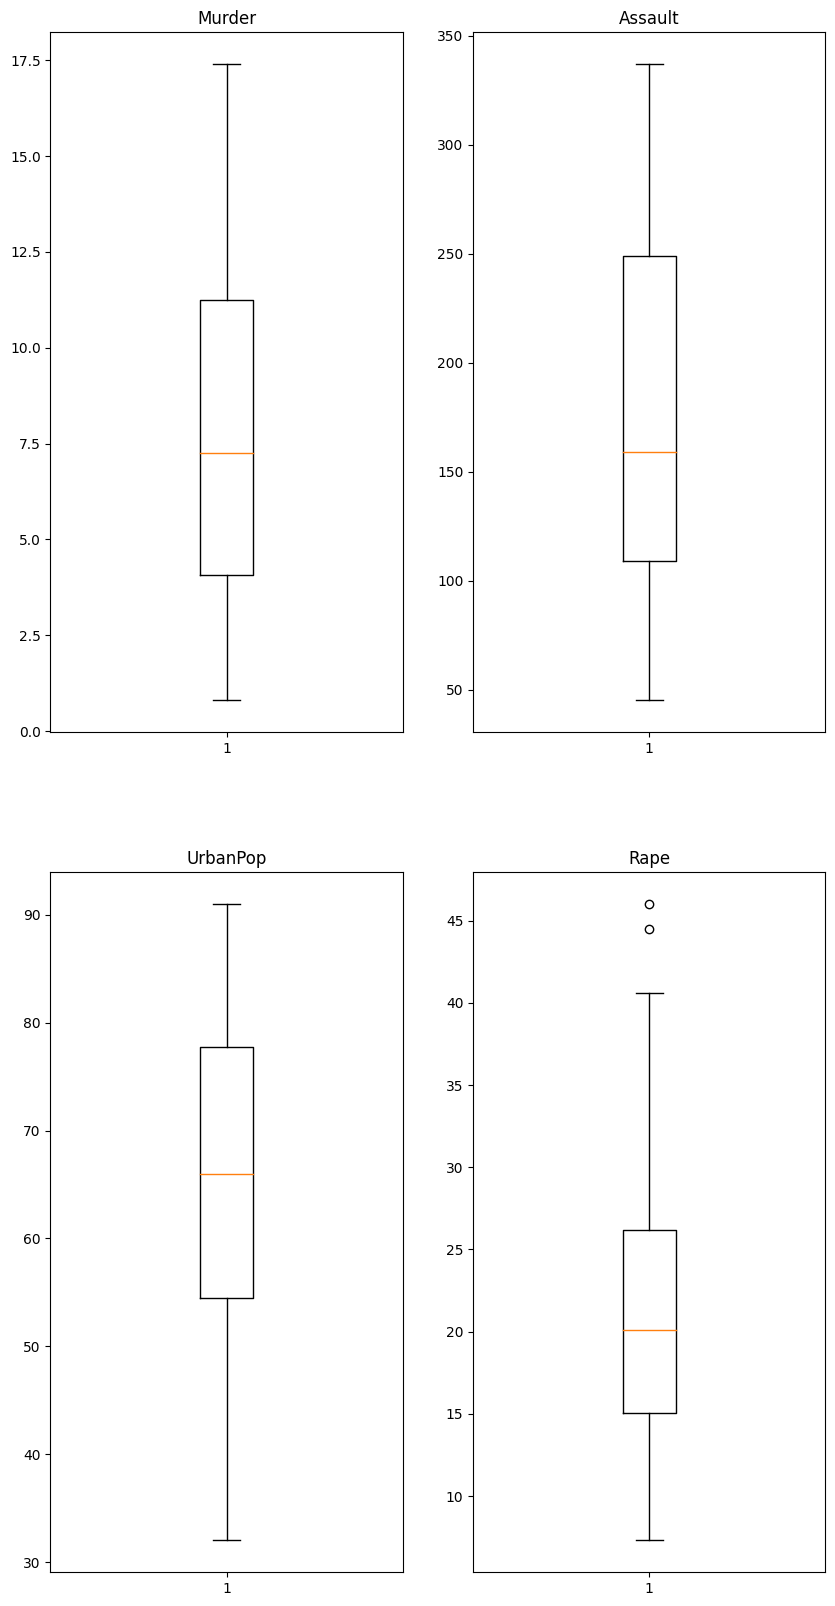

In [59]:
plt.figure(figsize=(10,20))
plt.subplot(2,2,1)
plt.title("Murder")
plt.boxplot(data.Murder)

plt.subplot(2,2,2)
plt.title("Assault")
plt.boxplot(data.Assault)

plt.subplot(2,2,3)
plt.title("UrbanPop")
plt.boxplot(data.UrbanPop)

plt.subplot(2,2,4)
plt.title("Rape")
plt.boxplot(data.Rape)


#there are 2 outliers in Rape

In [60]:
  #Scaling the data
  from sklearn.preprocessing import StandardScaler

In [61]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data.iloc[:,1:])
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [62]:
from sklearn.cluster import KMeans

In [63]:
#Hyperparameter Tuning
WCSS=[]
for i in range(1,11):
  model=KMeans(n_clusters=i, random_state=42)
  model.fit(scaled_data)
  WCSS.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [64]:
len(WCSS)

10

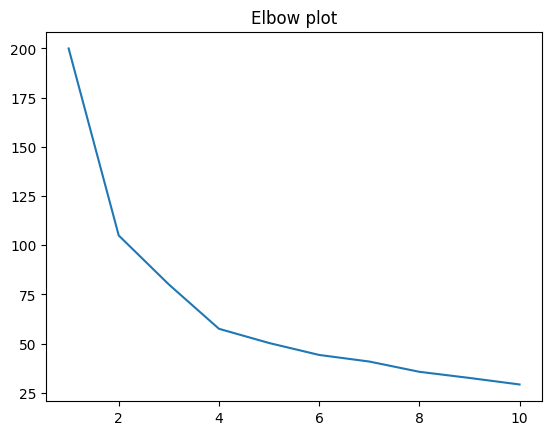

In [65]:
#ELBOW PLOT

plt.plot(range(1,11), WCSS)
plt.title("Elbow plot")
plt.show()

In [66]:
#Let us consider k=4 as after 4 we can see there is no much change

In [67]:
#Build Model
final_model=KMeans(n_clusters=4, random_state=42)
final_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [68]:
data['ClusterId']=final_model.predict(scaled_data)

In [69]:
data.head()

,State,Murder,Assault,UrbanPop,Rape,ClusterId
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [70]:
#we will group our data based on clusters
grp=data.groupby(data['ClusterId'])

In [71]:
for x,y in grp:
  print(y)
  print('--------------------------------------------------------------------------------')

            State  Murder  Assault  UrbanPop  Rape  ClusterId
6     Connecticut     3.3      110        77  11.1          0
7        Delaware     5.9      238        72  15.8          0
10         Hawaii     5.3       46        83  20.2          0
13        Indiana     7.2      113        65  21.0          0
15         Kansas     6.0      115        66  18.0          0
20  Massachusetts     4.4      149        85  16.3          0
29     New Jersey     7.4      159        89  18.8          0
34           Ohio     7.3      120        75  21.4          0
35       Oklahoma     6.6      151        68  20.0          0
36         Oregon     4.9      159        67  29.3          0
37   Pennsylvania     6.3      106        72  14.9          0
38   Rhode Island     3.4      174        87   8.3          0
43           Utah     3.2      120        80  22.9          0
45       Virginia     8.5      156        63  20.7          0
46     Washington     4.0      145        73  26.2          0
49      

In [72]:
grp.agg(['mean'])

<ipython-input-72-4b2ebb0294eb>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grp.agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
ClusterId,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


In [73]:
#We can say in cluster 3 all Murder,Assault,UrbanPop,Rape are very less compared to others
#we have high assult and rape and urbanpop in cluster 2 states
#We have #high murder rate in cluster 1



DBSCAN CLUSTERING

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
#build the model
model1=DBSCAN(eps=1.5, min_samples=4, metric='euclidean')
model1.fit(scaled_data)
model1.fit_predict(scaled_data)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [76]:
#attaching o/p to the original data
data['DBSCAn_ClusterId']=model1.fit_predict(scaled_data)

In [77]:
data.head()

,State,Murder,Assault,UrbanPop,Rape,ClusterId,DBSCAn_ClusterId
0,Alabama,13.2,236,58,21.2,1,0
1,Alaska,10.0,263,48,44.5,2,-1
2,Arizona,8.1,294,80,31.0,2,0
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,2,0


In [78]:
#We have Alaska as noise point and remaining all are grouped into 1 cluster

Hierarchical Clustering

In [79]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
model2=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  #affinity is the way in which you want to find the distance)
#as we already checked the k value using elbow plot, we will take 4
model2.fit(scaled_data)
model2.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [81]:
data['Hier_ClusterId']=model2.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [82]:
data.head()

,State,Murder,Assault,UrbanPop,Rape,ClusterId,DBSCAn_ClusterId,Hier_ClusterId
0,Alabama,13.2,236,58,21.2,1,0,0
1,Alaska,10.0,263,48,44.5,2,-1,0
2,Arizona,8.1,294,80,31.0,2,0,2
3,Arkansas,8.8,190,50,19.5,1,0,1
4,California,9.0,276,91,40.6,2,0,2


In [83]:
#we will group our data based on clusters
grp1=data.groupby(data['Hier_ClusterId'])

In [84]:
for x,y in grp1:
  print(y)
  print("-------------------------------------------------------------------------------------------------")


             State  Murder  Assault  UrbanPop  Rape  ClusterId  \
0          Alabama    13.2      236        58  21.2          1   
1           Alaska    10.0      263        48  44.5          2   
9          Georgia    17.4      211        60  25.8          1   
17       Louisiana    15.4      249        66  22.2          1   
23     Mississippi    16.1      259        44  17.1          1   
32  North Carolina    13.0      337        45  16.1          1   
39  South Carolina    14.4      279        48  22.5          1   
41       Tennessee    13.2      188        59  26.9          1   

    DBSCAn_ClusterId  Hier_ClusterId  
0                  0               0  
1                 -1               0  
9                  0               0  
17                 0               0  
23                 0               0  
32                 0               0  
39                 0               0  
41                 0               0  
------------------------------------------------------

In [85]:
grp1[['Murder','Assault','UrbanPop','Rape']].agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Hier_ClusterId,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [86]:
#we have high assault, rape and urbanpop in cluster 2
#we have low murder, assault, rape and urbanpop in cluster 3
#High Murder in cluster 0



In [87]:
#dendrogram

from scipy.cluster import hierarchy

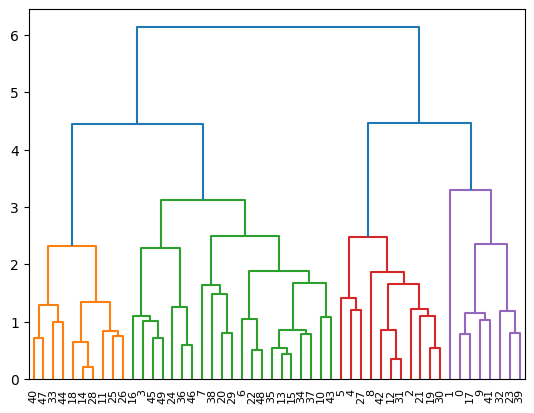

In [88]:
hr=hierarchy.linkage(scaled_data, method='complete')
dn=hierarchy.dendrogram(hr)

In [89]:
#The snaller the height, there is more similarity.
#14 and 28 are more similar


silhouette_score

In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data, data['Hier_ClusterId'] )

0.31595507426164543

In [91]:
silhouette_score(scaled_data, data['ClusterId'] )

0.33968891433344395

In [92]:
silhouette_score(scaled_data, data['DBSCAn_ClusterId'] )

0.23455598753159795

In [ ]:
#from the above silhouette_score we can say KMeans clustering is the good model with good silhouette score